In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

Data Collection & Pre-Processing


In [9]:
raw_mail_data=pd.read_csv('/content/mail_data.csv')
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [10]:
#replace null value with the null string
mail_data=raw_mail_data.where(pd.notnull(raw_mail_data),'')
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 2)

In [12]:
#Label spam mail as 0 and ham mail as 1
mail_data.loc[mail_data['Category']=='spam','Category',]=0
mail_data.loc[mail_data['Category']=='ham','Category',]=1


In [13]:
#Separating the data as texts and labels
X=mail_data['Message']

Y=mail_data['Category']

Frequency of Ham and Spam mail

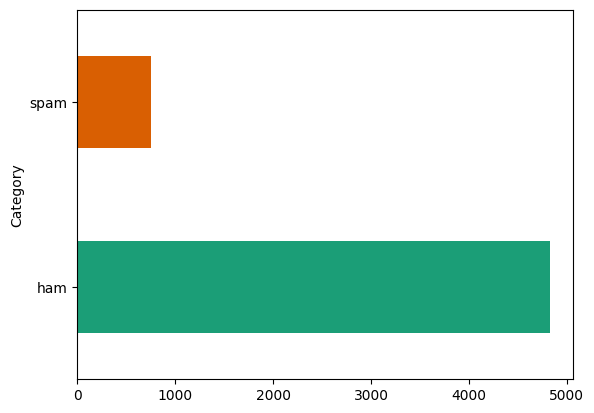

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
raw_mail_data.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.show()

Splitting the data into training data & test data

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [16]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


Feature Extraction


In [17]:
#transform the text data to feature vectors
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)

#convert Y_train and Y_test values as integers
Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

In [18]:
print(X_train)
print(X_train_features)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object
  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1,

Training and Testing the Models


In [19]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': MultinomialNB()
}

In [20]:
results = {}

for model_name, model in models.items():
    model.fit(X_train_features, Y_train)
    Y_pred = model.predict(X_test_features)
    accuracy = accuracy_score(Y_test, Y_pred)
    report = classification_report(Y_test, Y_pred, target_names=['ham', 'spam'])
    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': report
    }

results_df = pd.DataFrame(results).T

Printing Accuracies and Classification Report

In [21]:
print("Model Accuracies:")
print(results_df['accuracy'])

for model_name, result in results.items():
    print(f"\nClassification Report for {model_name}:\n")
    print(result['classification_report'])

Model Accuracies:
Logistic Regression    0.965919
SVM                    0.979372
Random Forest          0.974888
Naive Bayes            0.973094
Name: accuracy, dtype: object

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

         ham       1.00      0.75      0.86       155
        spam       0.96      1.00      0.98       960

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


Classification Report for SVM:

              precision    recall  f1-score   support

         ham       1.00      0.85      0.92       155
        spam       0.98      1.00      0.99       960

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Classification Report for Random Forest:

              precision    recall  f1-score  

Confusion Matrix for each Model



Confusion Matrix for Logistic Regression:



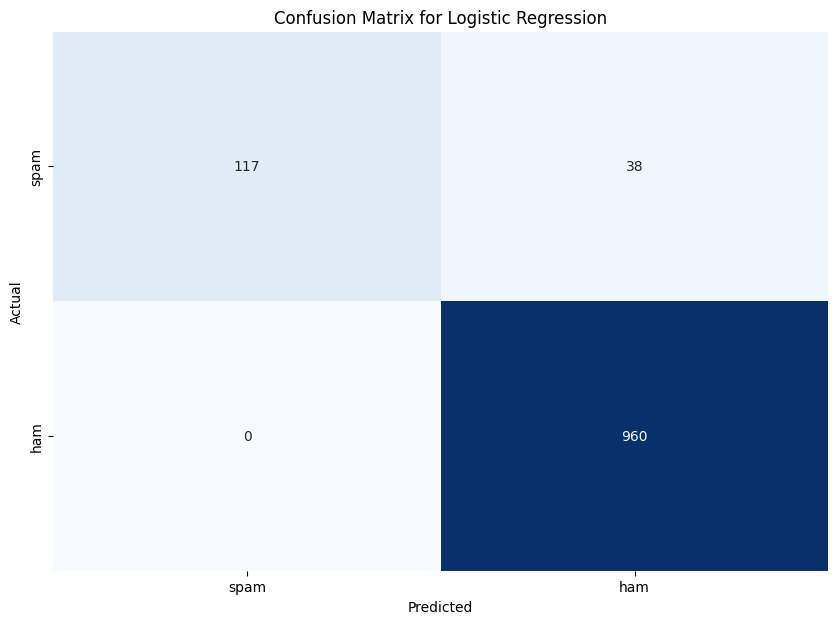


Confusion Matrix for SVM:



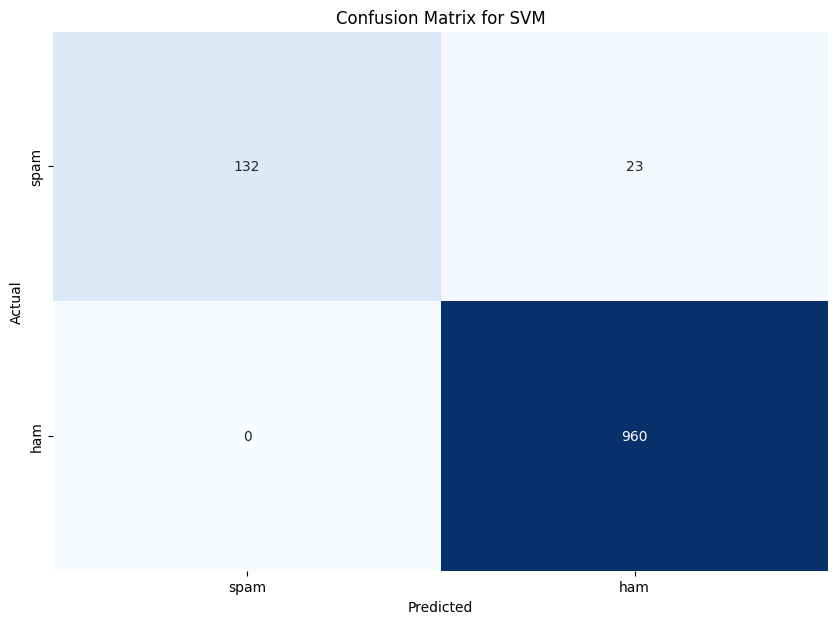


Confusion Matrix for Random Forest:



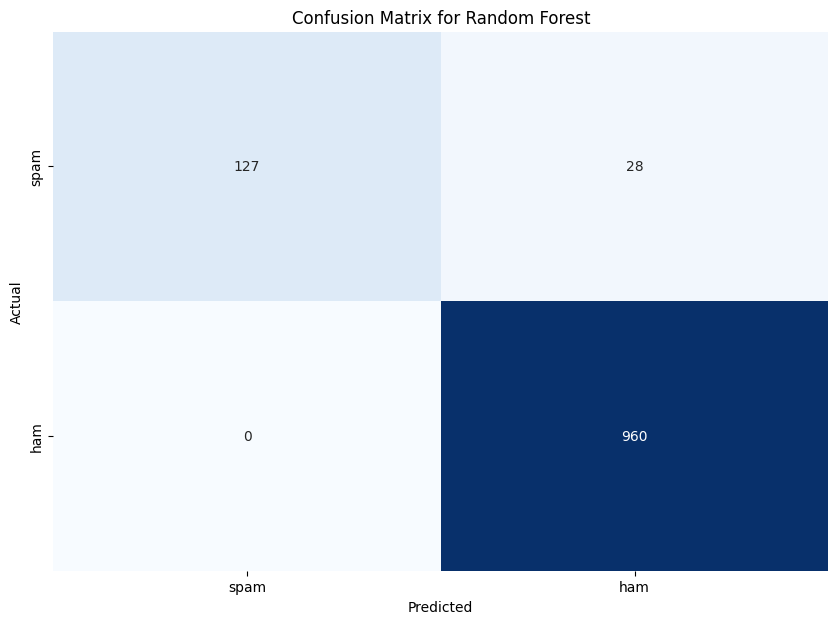


Confusion Matrix for Naive Bayes:



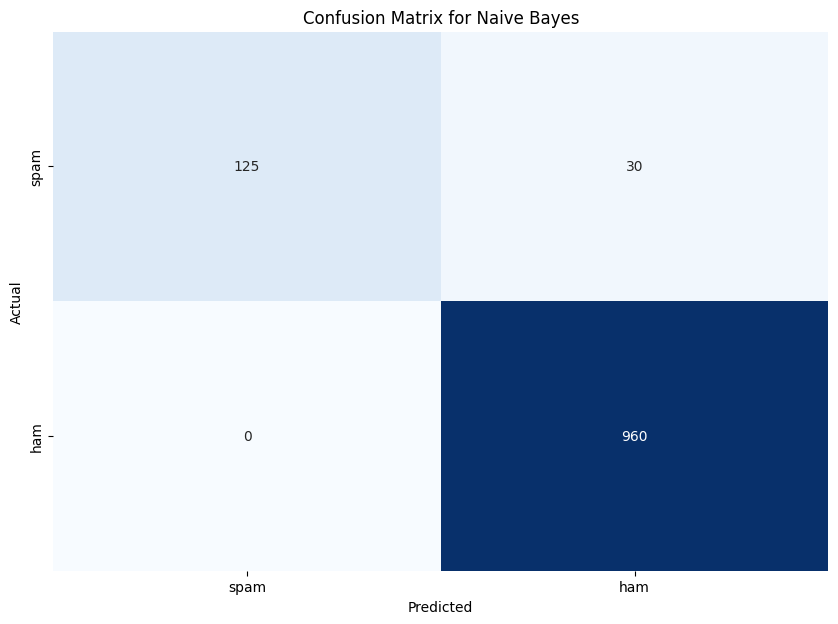

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define class labels
class_labels = ['spam', 'ham']

for model_name, model in models.items():
    model.fit(X_train_features, Y_train)
    Y_pred = model.predict(X_test_features)
    cm = confusion_matrix(Y_test, Y_pred, labels=[0, 1])

    print(f"\nConfusion Matrix for {model_name}:\n")
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



Plotting Model Accuracies

<ipython-input-23-525452ea993e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


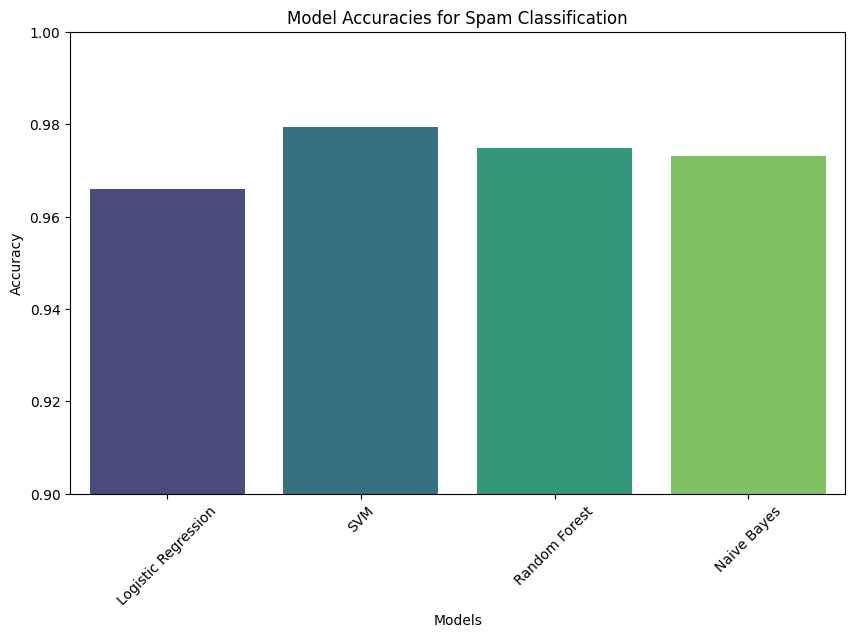

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

model_names = list(results_df.index)
accuracies = results_df['accuracy']

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Accuracies for Spam Classification')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.xticks(rotation=45)
plt.show()

Word size proportional to number of occurences

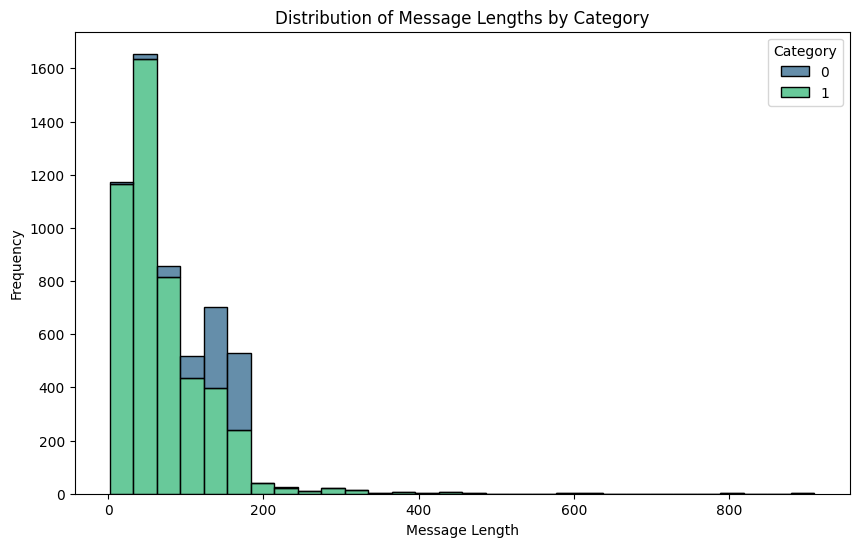

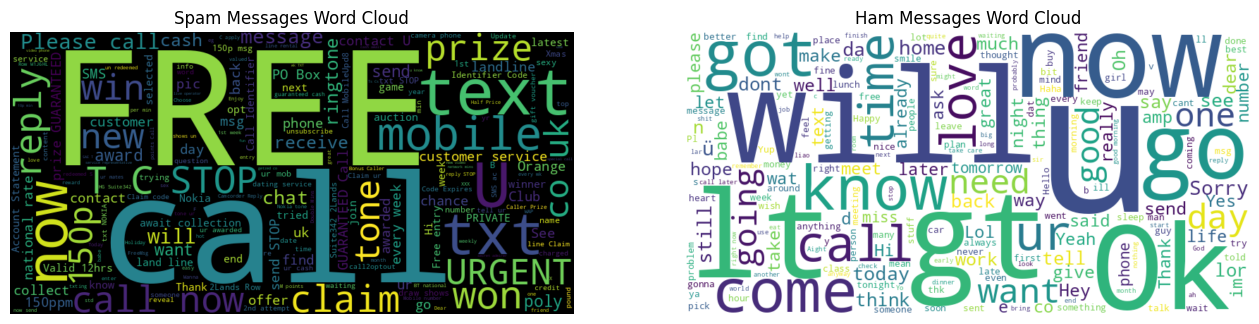

In [24]:
# Distribution of message lengths
mail_data['Message Length'] = mail_data['Message'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=mail_data, x='Message Length', hue='Category', multiple='stack', palette='viridis', bins=30)
plt.title('Distribution of Message Lengths by Category')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

# Word cloud visualization for spam and ham messages
from wordcloud import WordCloud

spam_messages = ' '.join(mail_data[mail_data['Category'] == 0]['Message'])
ham_messages = ' '.join(mail_data[mail_data['Category'] == 1]['Message'])

spam_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(spam_messages)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_messages)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Messages Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Messages Word Cloud')
plt.axis('off')

plt.show()

Buiding a Predictive System

In [32]:
# Sample email input
input_mail = ["XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap.xxxmobilemovieclub.com?n=QJKGIGHJJGCBL"]

# Transform the input email data
input_data_features = feature_extraction.transform(input_mail)

# Predict using the trained SVC model because of its highest accuracy
svc_model = models['SVM']
prediction = svc_model.predict(input_data_features)

# Check if the email is ham or spam
if prediction[0] == 1:
    print('Ham mail')
else:
    print('Spam mail')



Spam mail
